### 주제 : 네이버 웹툰에서 특정 요인이 작품의 인기에 미치는 영향
##### [ 조건 ] <br/>
- 명제 1 : 요인은 '태그, 이용 가능 연령, 요일, 작가'이다. <br/>
- 명제 2 : 작품의 인기는 '선호작 수, 최근 10화 평균 평점'로 평가한다. <br/>
- 명제 3 : 10화 미만 연재 작품의 경우 현재 존재하는 모든 화의 평균 평점으로 최근 10화 평균 평점을 대체한다. 

##### [ 가설 ] <br/>
- 가설 1 : 특정 '태그'를 가지고 있는 웹툰의 인기가 높을 것이다. <br/>
- 가설 2 : 특정 '요일'에 연재하는 웹툰의 인기가 높을 것이다. <br/>
- 가설 3 : 특정 '이용 가능 연령'인 웹툰의 인기가 높을 것이다. <br/>
- 가설 4 : 특정 '작가'가 만든 웹툰의 인기가 높을 것이다. <br/>
→ 여러 작품을 연재하는 '작가'의 웹툰의 인기가 높을 것이다. ( 수정 )<br/>
수정 사유 : 작가의 수가 너무 많음 ( 원작자, 스토리, 그림작가 포함 약 900명 )<br/>
※ '가설 4'에서는 20화 이하 연재된 웹툰은 '평균 선호작 수'에 이상을 일으킬 수 있다고 판단하여 제외하였다. <br/>
- 가설 4 + : 2개 이상 웹툰을 연재하는 '작가'에 따라 인기가 다르게 나올 것이다. <br/>
→ 가설 4의 검증 과정에서 발생한다. ( 추가 )

##### [ 분석 결과 ] <br/>
- 분석 결과 1 : 학원물, 먼치킨, 사이다, 게임판타지, 액션 등의 순으로 웹툰의 인기가 높음을 알 수 있다. <br/>
스릴러와 학원물의 평균 선호작 수의 차이는 약 290,000회 이다. ( 288,941.26 ) <br/>
※ 상위 22개 태그의 인기에 대하여 나타낸 그래프이므로 아래 그래프에 포함되지 않은 태그의 경우 더 큰 차이가 발생할 수 있다. <br/>
<img src=.\Graph_Image\Tag_Graph.png width="960px" height="609px"> <br/> <br/>

- 분석 결과 2 : 금, 토, 월, 화, 일, 수, 목요일의 순으로 웹툰의 인기가 높음을 알 수 있다. <br/>
금요웹툰과 목요웹툰의 평균 선호작 수의 차이는 약 44,500회 이다. ( 44,524.39 ) <br/>
<img src=.\Graph_Image\Day_Graph.png width="840px" height="332px"> <br/> <br/>

- 분석 결과 3 : 15세, 12세, 18세, 전체이용가의 순으로 웹툰의 인기가 높음을 알 수 있다. <br/>
15세와 전체이용가 웹툰의 평균 선호작 수의 차이는 약 55,500회 이다. ( 55,549.97 ) <br/>
<img src=.\Graph_Image\Age_Graph.png width="840px" height="255px"> <br/> <br/>

- 분석 결과 4 : 작품을 여러개 그리는 '작가'의 웹툰은 인기가 높음을 알 수 있다. ( 검증 4 + 참고 )  <br/>
1개 웹툰을 연재하는 작가들의 평균 선호작 수는 약 163,000회 이다. ( 163,527.2 ) <br/>
아래의 그래프에서 보이듯, 예상했던 결과와 다르게 ( 관련 없게 ) 나왔다. <br/>
<img src=.\Graph_Image\Artists_Graph_(After).png width="840px" height="255px"><br/> <br/>

- 분석 결과 4 + : 약 60 %의 2개 이상의 웹툰을 연재하는 작가들이 1개 웹툰을 연재하는 작가보다 인기가 높음을 알 수 있다. <br/>
※ 비슷하거나 다소 낮은 '문성호'와 '영'은 퍼센트에서 제외 했다. <br/> <br/>
이에 '2개 이상 웹툰을 연재하는 작가에 따라 인기가 다르게 나올 것이다.'라는 가설을 새로운 세우고 작가별 그래프를 따로 만들어보았다. <br/>
아래의 그래프는 2개 웹툰을 연재하는 작가의 인기에 대하여 나타낸 그래프이다. <br/>
2개 웹툰을 연재하는 작가들 중 평균 선호작 수가 1개 웹툰을 연재하는 작가들의 평균 선호작보다 높은 작가들은 '봄소희' ( 167,795.5 ) 이상이고, <br/>
비슷하거나 다소 낮은 작가는 '문성호' ( 162,385 ) 와 '영' ( 157,431 ) 이며, 이하의 작가들은 평균 선호작 수보다 낮음을 확인할 수 있다. <br/>
<img src=.\Graph_Image\Artists_Graph_(After+1).png width="945px" height="565px"><br/> <br/>
또한 아래의 그래프는 3개 이상 웹툰을 연재하는 작가의 인기에 대하여 나타낸 그래프이다. <br/>
3개 이상 웹툰을 연재하는 작가들 중 평균 선호작 수가 1개 웹툰을 연재하는 작가들의 평균 선호작보다 높은 작가들은 <br/>
3개를 연재하는 'JP' ( 243,499 ) 와 6개를 연재하는 '박태준 만화회사' ( 456,159.17 ) 이고, <br/>
3개를 연재하는 '명랑' ( 77,495.33 ) 과 4개를 연재하는 'HYBE' ( 66,723.5 ) 는 평균 선호작 수보다 낮음을 확인할 수 있다. <br/>
<img src=.\Graph_Image\Artists_Graph_(After+2).png width="840px" height="255px">

##### [ 결론 ]
- '태그'와 웹툰의 인기가 관련 있으며, '학원물, 먼치킨, 사이다, 게임판타지, 액션' 등의 순으로 웹툰의 인기가 높음을 알 수 있다. <br/>
- '요일'과 웹툰의 인기가 관련 있으며,  '금, 토, 월, 화, 일, 수, 목'의 순으로 웹툰의 인기가 높음을 알 수 있다. <br/>
- '이용 가능 연령'과 웹툰의 인기가 관련 있으며, '15세, 12세, 18세, 전체이용가'의 순으로 웹툰의 인기가 높음을 알 수 있다. <br/>
- '여러 작품을 그리는 작가'와 웹툰의 인기가 관련 있으며, 약 60 %의 2개 이상의 웹툰을 연재하는 작가들이 1개 웹툰을 연재하는 작가보다 인기가 높음을 알 수 있다. 

##### [ 참고문헌 ]
- class : https://engineer-mole.tistory.com/190
- open : https://engineer-mole.tistory.com/190
- string : https://codechacha.com/ko/python-remove-newline-in-string
- try-except : https://dojang.io/mod/page/view.php?id=2398
- selenium1 : https://hi-guten-tag.tistory.com/11
- selenium2 : https://aplab.tistory.com/entry/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EC%85%80%EB%A0%88%EB%8B%88%EC%9B%80-%EC%82%AC%EC%9A%A9%EB%B2%95-%ED%8A%B9%EC%A0%95-%EC%9A%94%EC%86%8C%EB%A5%BC-%EC%84%A0%ED%83%9D%ED%95%98%EB%8A%94-%EB%B0%A9%EB%B2%95%EC%9D%80
- selenium3 : https://pythonexamples.org/python-selenium-find-element-by-tag-name
- selenium4 : https://wikidocs.net/149358
- selenium5 : https://porinn.tistory.com/28
- selenium6 : https://hellodoor.tistory.com/148
- 엑셀화 : https://cuorej.tistory.com/entry/python-openpyxl-%EC%82%AC%EC%9A%A9%EB%B2%95-%EB%B0%8F-%ED%95%84%EC%88%98%EC%98%88%EC%A0%9C-%EC%97%91%EC%85%80
- clear console : https://www.pythonpip.com/python-tutorials/how-to-clear-console-in-python
- pandas : https://benn.tistory.com/11
- 막대 그래프 : https://benn.tistory.com/11
- 이중 축 : https://www.youtube.com/watch?v=NAwgPq7Tnr8
- 그래프 위에 글자 쓰기 : https://suy379.tistory.com/148

### 크롤링 / 엑셀화 / DataFrame / 그래프화 ( 이하 Code / Markdown을 통해 확인 )

- 데이터 저장 과정에서 list, dict, Class 사용
    - 'WebtoonName' 참고 <br/>
    - 웹툰 제목을 받아올 수 있는 'https://comic.naver.com/webtoon'에서 각 웹툰의 제목 받아오기 <br/>
    : 웹툰 제목을 잘 받아왔는지 확인하기 위해 텍스트 파일 생성 <br/>
    - 이후 각 웹툰을 webtoonlist = [ ]에 dict{ '웹툰 제목' : Class() } 형태로 저장 <br/>
    - Class 구성 <br/>
        - str( 제목 ), set( 태그 ), int( 이용 연령 ), str( 요일 ), int( 선호작 수 ), float( 최근 10화 평균 평점 ), set( 작가 ) <br/>
        - **생성자** ( self, 이름 ) <br/>
        - 각 데이터 설정 함수 ( self, 데이터 ) <br/>
        : 태그, 작가 설정 과정에서 태그, 작가 = set()을 통해 초기화 해주지 않으면 오류 발생. <br/>
        → *Why? ( 아직 의문이 해소되지 않음 )* <br/>
<br/>
- 웹페이지 이동 방법 1 ( 오류 )
    - 웹툰의 검색 창에 각 웹툰의 이름 입력 및 검색 버튼 클릭 <br/>
    - 이후 웹툰 검색 결과에서 웹툰 페이지로 이동을 위해 버튼 클릭 <br/>
<br/>
- 웹페이지 이동 방법 2 ( 작동 )
    - 전체 웹툰 제목을 받아올 수 있는 'https://comic.naver.com/webtoon'에서 각 웹툰의 href 값을 받아오기 <br/>
    - 이후 driver.get(href)를 통해 중간 과정 없이 바로 웹툰 페이지로 이동하여 크롤링 <br/>
    : 방법 변경을 통해 웹 페이지의 이동 횟수 ½로 감소<br/>
    - 연재한 웹툰 수가 10화 이내인지 확인하는 과정에서 List Comprehension을 사용 <br/> 
<br/>
- 정상 작동 확인
    - 제목, 태그, 이용 연령, 작가, 요일, 평균 평점, 선호작 수 출력 <br/>
    - from IPython.display import clear_output를 활용하여 1개의 웹툰씩 확인 가능 <br/>
    - 0.5초 마다 각 웹툰의 정보가 출력 <br/>
<br/>
- 엑셀화
    - 'Webtoon List.xlsx' 참고 <br/>
    - 각 컬럼 명 <br/>
        - 제목 | 태그 | 이용 연령 | 작가 | 요일 | 평균 평점 | 선호작 수 <br/>
    - 행 개수 <br/>
        - 581개 ( 2023년 06월 06일 기준 / 이후 프로그램을 실행할 때마다 업데이트 예정 ) <br/>
    <img src=.\참고\jpg1.jpg width="708px" height="400px" > <img src=.\참고\jpg2.jpg width="708px" height="400px" >
<br/>
- DataFrame
    - (Object)name = set ( ' (Object) 이름 ' )
    - (Object)list = { '웹툰 제목' : [ float( 평균 평점 ), float( 평균 선호작 수 ) ] } <br/>
    - 각 컬럼 명 <br/>
        - Object | 평균 평점 | 선호작 수 <br/>
    - 태그 : srtd_df1 <br/>
        - 웹툰의 수가 20개 잇상일 경우만 색인 ( 총 22개 태그만 추출 ) <br/>
        - '평균 선호작 수' 내림차순 정렬 <br/>
        <img src=.\DataFrame_Image\Tag_DataFrame.jpg width="360px" height="637px"> 
    - 요일 : srtd_df2 <br/>
        - 웹툰의 수가 13개 이상일 경우만 색인 ( 월 ~ 일까지 총 7개 요일만 추출 ) <br/>
        - 요일 순서대로 재배치 <br/>
        <img src=.\DataFrame_Image\Day_DataFrame.jpg width="259px" height="229px"> 
    - 이용 가능 연령 : srtd_df3 <br/>
        - 이용 가능 연령 오름차순 재배치 ( 전체, 12세, 15세, 18세이용가 ) <br/>
        <img src=.\DataFrame_Image\Age_DataFrame.jpg width="311px" height="150px"> 
    - 작가 <br/>
        - webtooncount { '웹툰 제목' : [ float( 평균 평점 ), float( 평균 선호작 수 ), int( 연재 웹툰 수 ) ] }
        - 작가별로 나눈 DataFrame 생성 : srtd_df4 <br/>
        <img src=.\DataFrame_Image\Artists_DataFrame_(Before).jpg width="267px" height="402px"> <br/>
        → 약 900명의 작가로 인해 그래프 시인성 떨어짐 <br/>
        → 작가의 연재 웹툰 수로 가설 변경 <br/>
            - 웹툰 갯수별 색인 : srtd_df5 <br/>
            <img src=.\DataFrame_Image\Artists_DataFrame_(After).jpg width="257px" height="174px"> 
            - 2개, 3개 이상 웹툰 색인 : srtd_df6 <br/>
                - srtd_df6 [ { '2개 웹툰 연재 작가명' : [ int( 평균 평점 ), int( 평균 선호작 수 ) ] }, { '3개 이상 웹툰 연재 작가명' : [ int( 평균 평점 ), int( 평균 선호작 수 ) ] } ]
                - 2개 웹툰 연재 작가 색인 ( 20명 )<br/>
                <img src=.\DataFrame_Image\Artists_DataFrame_(After+1).jpg width="331px" height="605px"> 
                - 3개 이상 웹툰 연재 작가 색인 ( 4명 ) <br/>
                <img src=.\DataFrame_Image\Artists_DataFrame_(After+2).jpg width="474px" height="149px"> 
- 그래프화
    - seaborn으로 이중 x축 구성 <br/>
        - 상단 : 평균 선호작 수 (진한 값) <br/>
        - 하단 : 평균 평점 (흐린 값) <br/>

### Selenium / Webdriver 기본설정

In [86]:
from selenium import webdriver
import time
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
_sleep_time = 0.5

### Selenium / Webdriver 설치 

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
from openpyxl import Workbook
import time
import csv
import copy

options = Options()
options.add_experimental_option('detach', True)
options.add_experimental_option('excludeSwitches', ['enable-logging'])
service = Service(ChromeDriverManager().install())

### 페이지 불러오기

In [226]:
from selenium import webdriver\

driver = webdriver.Chrome(".\chromedriver.exe")

driver.get("https://comic.naver.com/webtoon")
time.sleep(5)

C:\Users\Adminator\AppData\Local\Temp\ipykernel_13836\938689807.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(".\chromedriver.exe")


### class Webtoon( )
1. 이름 = " "<br/>
2. 태그 = [ ]<br/>
3. 이용 연령 = 0 <br/>
4. 요일 = " "<br/>
5. 선호작 수 = 0 <br/>
6. 최근 10화 평균 평점 = 0.0 <br/>
7. 웹툰 작가 설정 = [ ]

In [88]:
class Webtoon() :
    tags=set()
    age=0
    day=""
    select = 0
    avg_rating10 = 0.0
    artists = set()

    def __init__(self, name="") :   # 웹툰 설정
        if name == "" :
            print("웹툰명이 입력되지 않았습니다. ")
            return None
        else :
            self.name = name

    def SetWTTags(self, mytags:list) :     # 웹툰 태그 추가
        self.tags=set()             # 없으면 태그 오류 (모든 태그가 입력됨) Why?
        for content in mytags :
            if content not in self.tags :
                self.tags.add(content)
    
    def SetWTAge(self, ageset:str) :             # 웹툰 시청 나이 설정
        if ageset == "전체연령가" :
            self.age = 0
        elif ageset == "12세 이용가" :
            self.age = 12
        elif ageset == "15세 이용가" :
            self.age = 15
        elif ageset == "18세 이용가" :
            self.age = 18

    def SetWTDay(self, myday:str) :     # 웹툰 연재 날짜 추가
        if myday == None :
            print("요일이 입력되지 않았습니다. ")
        else :
            self.day = myday.replace('요웹툰','')
    
    def SetWTSelect(self, num:int) :          # 웹툰 선착 설정
        self.select = num
    
    def SetWTRating(self, num:float) :     # 웹툰 최근 10화 평균 평점 설정
        self.avg_rating10 = num
    
    def SetWTArtists(self, myartists:list) :  # 웹툰 작가 설정
        self.artists = set()        # 없으면 작가 오류 (모든 작가가 입력됨) Why?
        if myartists==[] :
            print("작가명이 입력되지 않았습니다. ")
            return None
        else :
            for content in myartists :
                if content not in self.artists :
                    self.artists.add(content)
    

### 웹툰 제목
웹툰 제목 크롤링<br/>
→ webtoon = set( ) # 중복 제거<br/>

In [89]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import time

webtoon=set()
driver.get("https://comic.naver.com/webtoon")
time.sleep(5)

# for title in driver.find_element(By.CLASS_NAME, 'WeekdayMainView__daily_list--R52q0').find_elements('class name', 'text') :
for title in driver.find_element(By.CLASS_NAME, 'WeekdayMainView__daily_all_wrap--UvRFc').find_elements('class name', 'text') :
    webtoon.add(title.text)

### WebtoonName.txt

In [16]:
from selenium import webdriver

with open('.\WebtoonName.txt','wt') as op:
    for content in webtoon :
        op.write(str(content)+"\n")

### 저장
class Webtoon( ) 형태로 각각의 웹툰을 저장<br/>
→ webtoonlist={ 웹툰 제목 : class Webtoon( ) }

In [234]:
webtoonlist={}
for content in webtoon :
    webtoonlist[content] = Webtoon(content)

### 테스트

In [6]:
# print(webtoonlist.keys())

for content in webtoonlist.keys() :
    print(webtoonlist[content].name)

아포크리파
네버엔딩달링
순정빌런
천하제일 대사형
선배는 나빠요!
봐선 안되는 것
퀘스트지상주의
최강부캐
판사 이한영
나쁜 마법사의 꿈
여신님의 호랑이 공략법
헥토파스칼
전남편의 미친개를 길들였다
강남의 기사
중독연구소
여우자매
1초
생존고백
놓지마 정신줄 시즌3
또다시 열일곱
그 기사가 레이디로 사는 법
바스티안
칼부림
THE 런웨이
메모리얼
히어로메이커
한림체육관
히어로 더 맥시멈
나이트런
별난식당
흑화한 노예남을 길들였다
방송은 방송으로 봐
역주행!
세기말 풋사과 보습학원
싸움독학
플레이어
별을 쫓는 소년들
사랑받는 시집살이
이상한 변호사 우영우
킬링대디
세레나
스터디그룹
허리케인 공주님
완벽한 파트너
연우의 순정
사랑의 헌옷수거함
그렇고 그런 바람에
최후의 금빛아이
에이머
방과후 레시피
묘령의 황자
부캐인생
나의 작은 서점
교환학생
칼에 취한 밤을 걷다
무사만리행
렌탈히어로
사상최강
크림슨 하트
짝사랑의 마침표
나노마신
보물과 괴물의 도시
신화급 귀속 아이템을 손에 넣었다
역대급 영지 설계사
배달의 신
내게 종말은 게임이다
윈드브레이커
진짜 진짜 이혼해
브레이커 : 이터널 포스
줄리에게
대리게임
백수세끼
슈퍼스타 천대리
외모지상주의
네이처맨
히어로 킬러
케찰코아틀 - 헤수스
아침을 지나 밤으로
은주의 방 2~3부
앵무살수
프로듀스 온리원
내남친 킹카만들기
올빼미와 여름 하늘
연애의 기록
해골협객
패션쇼
마도전생기
집사, 주세요!
연애고수
DARK MOON: 회색 도시
마루는 강쥐
약빨이 신선함
미시령
러브 똘츄얼리
우리의 연애일지
인과관계
세라는 망돌
나의 불편한 상사
미래의 골동품 가게
안미운 우리들
원하나
완벽한 부부는 없다
중매쟁이 아가 황녀님
너의 미소가 함정
거짓말의 뉘앙스
불쌍해야 하는 남자
아이돌만 하고 싶었는데
이종 격투기
원주민 공포만화
디펜스 게임의 폭군이 되었다
후덜덜덜 남극전자
108명의 그녀들
뮤즈 온 유명
킬 더 드래곤
뜨거운 홍차
내게 필요한 NO맨스
애증화음
시한부 천재 암흑기사
유사연애
우투리: THE LEGACY
로어 올림

### 웹툰 정보 크롤링 : 방식 1 (실패)
  
실패 사유 : 2 → 3 과정에서 오류 발생 <br/>
해결하기 힘들다고 판단 → 새로운 방식 탐색 <br/>
<br/>
[ 작동방식 ] <br/>
1. 검색에 각각의 웹툰 이름 입력 및 검색 버튼 클릭 <br/>
2. 웹툰 검색 페이지에서 일치하는 웹툰을 발견 <br/>
3. 웹툰 페이지로 들어가 웹 크롤링 <br/>
4. 이후 네이버 웹툰 전체 페이지로 이동 <br/>

In [ ]:
element = driver.find_element('class name', 'SearchBar__search_input--k5nfk')
scearch_botton = driver.find_element('class name', 'SearchBar__btn_search--SsL7v')

for content in webtoon :
    # 웹툰 이름 입력
    element.click()
    element.send_keys(content)

    # 검색버튼클릭
    scearch_botton.click()
    driver.implicitly_wait(_sleep_time*3)

    # 웹툰 페이지로 연결
    tags=[]
    name=""
    count=0.0
    if webtoonlist[content].name is driver.find_element('class name', 'ContentTitle__search_title--nndrf').text :
        driver.get(driver.find_element('class name', 'ContentTitle__title_area--x24vt ContentTitle__type_c--x4gqW').get_attribute('href'))
        driver.implicitly_wait(_sleep_time*3)
    else :
        print("웹 페이지 연결에 오류가 발생했습니다. ")
    
    # 웹툰 페이지
    if webtoonlist[content].name is content :
        webtoon_info_meta_info = driver.find_element('class name', 'ContentMetaInfo__meta_info--GbTg4')
        webtoon_tag_group_ul = driver.find_element('class name', 'TagGroup__tag_group--uUJza')

        # 작가 설정
        tags.append(webtoon_info_meta_info.find_element('class name', 'ContentMetaInfo__link--xTtO6').text)
        webtoonlist[content].SetWTArtist(tags) 

        # 요일 설정
        webtoonlist[content].SetWTDay(webtoon_info_meta_info.find_element('class name', 'ContentMetaInfo__info_item--utGrf').text) 

        # 나이 설정
        webtoonlist[content].SetWTAge(webtoon_info_meta_info.find_elements('class name', 'ContentMetaInfo__dot--uCVnt').text)

        # 태그 설정
        tags=[]
        tags=webtoon_tag_group_ul.find_element('class name', 'TagGroup__tag_group--uUJza').find_elements('tag name', 'a')
        webtoonlist[content].AddWTTags(tags)

        # 선작 설정
        webtoonlist[content].SetWTSelect(driver.find_element('class name', 'EpisodeListUser__count--fNEWK').text)
            
        # 평점 설정
        count_list = driver.find_elements('class name', 'text')
        for i in range(10) :
            count+=count_list[i]
        webtoonlist[content].SetWTRating(count/10)

### 웹툰 정보 크롤링 : 방식 2 ( 26m 50s )
[ 작동방식 ] <br/>
1. 모든 웹툰의 href를 set( )에 저장 <br/>
2. driver.get(href)를 통해 각 웹툰 사이트로 이동 <br/>
3. 웹툰 페이지로 들어가 웹 크롤링 <br/>

In [91]:
# 각 웹툰 href를 set에 저장

driver.get('https://comic.naver.com/webtoon')
time.sleep(5)

# webtoon_href_list = driver.find_element(By.CLASS_NAME, 'WeekdayMainView__daily_list--R52q0').find_elements(By.CLASS_NAME, 'ContentTitle__title_area--x24vt')
webtoon_href_list = driver.find_elements(By.CLASS_NAME, 'ContentTitle__title_area--x24vt')
href_list = set()
for href in webtoon_href_list :
    href_list.add(href.get_attribute('href'))

In [92]:
for href in href_list :
    # 웹툰 페이지로 이동
    driver.get(href)
    time.sleep(1.5)
    
    # 웹툰 페이지 제목 가져오기
    name = driver.find_element(By.CLASS_NAME, 'EpisodeListInfo__title--mYLjC')
    try :       # 휴재(<i> class)가 존재하는 경우
        name.find_element('tag name', 'i').text
        content = name.text.strip("\n휴재")
    except :    # 존재하지 않는 경우
        content = name.text
    
    # class에 데이터 채우기
    if webtoonlist[content].name == content :
        # 작가 / 요일 / 나이 설정
        artist, day, age = [], '', ''
        webtoon_info_list = None
        webtoon_info_list = driver.find_element(By.CSS_SELECTOR, '#content > div.EpisodeListInfo__comic_info--yRAu0 > div > div.ContentMetaInfo__meta_info--GbTg4').text.split("\n")
        day, age = webtoon_info_list[-3], webtoon_info_list[-1]
        for i in range(3) :
            webtoon_info_list.remove(webtoon_info_list[-1])
        for i in range(int(len(webtoon_info_list)/2)) :
            artist.append(webtoon_info_list[2*i+1])
        webtoonlist[content].SetWTArtists(artist)
        webtoonlist[content].SetWTDay(day)
        webtoonlist[content].SetWTAge(age)

        # 태그 설정
        tag = []
        tag_list = None
        tag_list = driver.find_element(By.CSS_SELECTOR, '#content > div.EpisodeListInfo__comic_info--yRAu0 > div > div.EpisodeListInfo__summary_wrap--ZWNW5 > div > div').text
        tag = tag_list.split("\n")
        webtoonlist[content].SetWTTags(tag)

        # 선작 설정
        webtoonlist[content].SetWTSelect(int(driver.find_element(By.CLASS_NAME, 'EpisodeListUser__count--fNEWK').text.replace(',','')))
            
        # 평점 설정
        amount = 0.0
        amount_list = driver.find_elements(By.CLASS_NAME, 'EpisodeListList__item--M8zq4')
        count_amount = 10 if len(amount_list) >= 10 else len(amount_list)
        for i in range(count_amount) :    
            amount+=float(amount_list[i].find_element(By.CLASS_NAME, 'text').text)
        amount/=count_amount
        webtoonlist[content].SetWTRating(amount)

### 정상 확인 ( 4m 50s )

In [93]:
from IPython.display import clear_output

for content in webtoonlist.keys() :
    print(f"제     목 : {webtoonlist[content].name}")
    print(f"태     그 : {webtoonlist[content].tags}")
    print(f"이용 연령 : {webtoonlist[content].age}")
    print(f"요     일 : {webtoonlist[content].day}")
    print(f"선호작 수 : {format(webtoonlist[content].select,',')}")
    print(f"평균 평점 : {webtoonlist[content].avg_rating10 : .3f}")
    print(f"작     가 : {webtoonlist[content].artists}")

    time.sleep(0.25)
    clear_output(wait=True)

제     목 : 잔불의 기사
태     그 : {'#판무', '#복수극', '#세계관', '#판타지'}
이용 연령 : 15
요     일 : 월
선호작 수 : 205,892
평균 평점 :  9.942
작     가 : {'환댕'}


### 엑셀화

In [194]:
from openpyxl import Workbook
import csv
wb = Workbook()
ws = wb.worksheets[0]

# 엑셀 시트명
ws.title = 'Webtoon List'

# 엑셀 파일 저장
wb.save(ws.title+'.xlsx')

# 엑셀 항목 설정
cell_list = ['A', 'B', 'C', 'D', 'E', 'F']
ws['A1'], ws['B1'], ws['C1'], ws['D1'], ws['E1'], ws['F1'], ws['G1'] = '제목', '태그', '이용 연령', '작가', '요일', '평균 평점', '선호작 수'

# 엑셀 항목 기입
count = 2
for content in webtoonlist.keys() :

    ws['A'+str(count)] = webtoonlist[content].name

    webtoontag = ""
    for tag in webtoonlist[content].tags :
        webtoontag += tag
    ws['B'+str(count)] = webtoontag

    ws['C'+str(count)] = webtoonlist[content].age

    webtoonartists = ""
    for artist in webtoonlist[content].artists :
        webtoonartists += (artist+",")
    ws['D'+str(count)] = webtoonartists[:-2]

    ws['E'+str(count)] = webtoonlist[content].day

    ws['F'+str(count)] = round(webtoonlist[content].avg_rating10, 3)

    ws['G'+str(count)] = webtoonlist[content].select
    count+=1

# 엑셀 파일 저장
wb.save(ws.title+'.xlsx')

### 그래프화

In [9]:
import pandas
import matplotlib as mp
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
%matplotlib inline

# 폰트 설정
mp.rc('font', family = 'NanumGothic')
# 유니코드에서 음수 부호 설정
mp.rc('axes', unicode_minus = False)

### 가설 1 : 태그 DataFrame

In [102]:
import numpy as np

taglist={}
tagname=set()
# 태그 이름 저장
for content in webtoonlist.keys() :
    for name in webtoonlist[content].tags :
        tagname.add(name)
        
# 태그별 평균 평점, 평균 선호작 수 저장
for tgnm in tagname :
    taglist[tgnm]=[0,0] # 평균 평점, 평균 선호작 수
    count = 0
    for content in webtoonlist.keys() :
        if tgnm in webtoonlist[content].tags :
            taglist[tgnm][0]+=webtoonlist[content].avg_rating10
            taglist[tgnm][1]+=webtoonlist[content].select
            count+=1
        else :
            continue
    # 태그를 가진 웹툰의 수가 20개 이상일 경우만 색인
    if count>=20 :
        taglist[tgnm][0]/=count # 평균 평점
        taglist[tgnm][1]/=count # 평균 선호작 수
    else :
        del(taglist[tgnm])
print('웹툰 20개 이상일 때 태그 개수: ', len(taglist), '개', sep='')

# 태그 별 그래프
df=pandas.DataFrame(columns=['태그명','평균 평점', '선호작 수'])
count = 0
for tgnm in taglist.keys() :
    df.loc[f'{count}'] = [tgnm, float(f'{taglist[tgnm][0] : .3f}'), float(f'{taglist[tgnm][1] : .2f}')]
    count+=1
srtd_df1 = df.sort_values(by='선호작 수', ascending=False)
display(srtd_df1) # 평균 선호작 수 내림차순 정리

웹툰 20개 이상일 때 태그 개수: 22개


,태그명,평균 평점,선호작 수
14,#학원물,9.539,371276.16
2,#먼치킨,9.569,299433.45
5,#사이다,9.876,268217.27
13,#게임판타지,9.530,226614.77
1,#액션,9.614,215827.17
11,#회귀,9.903,205888.93
3,#학원로맨스,9.903,200796.92
0,#드라마,9.716,173272.61
9,#무협/사극,9.837,160261.90
19,#판타지,9.806,147451.84


### 가설 1 : 태그 그래프

Text(0.5, 0, '평균 선호작 수 (진한 값)')

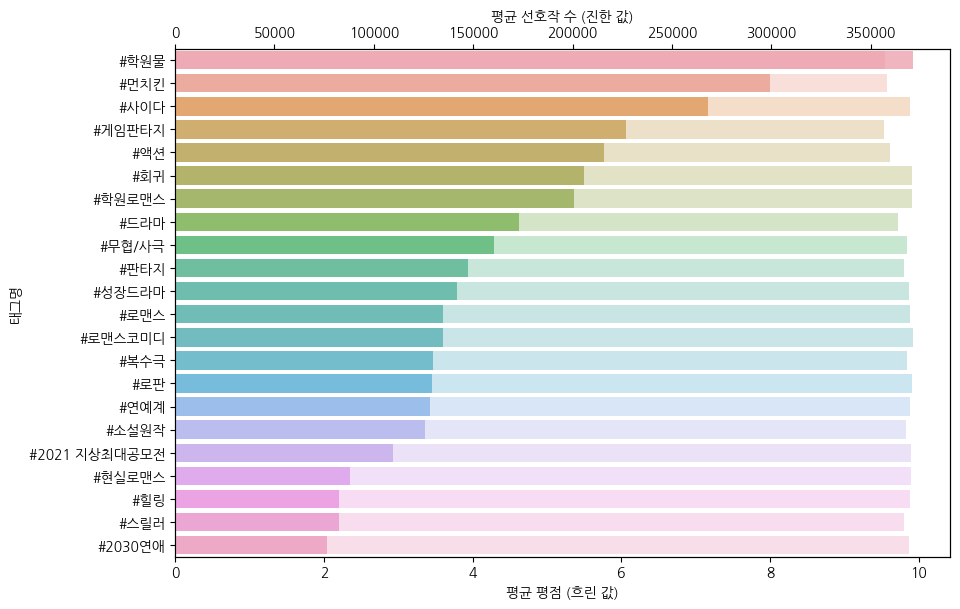

In [176]:
import seaborn as sns
%matplotlib inline

fig = plt.figure(figsize=(10,6.6))
ax1 = fig.add_subplot(1,1,1)
ax2 = ax1.twiny()
chart1 = sns.barplot(ax=ax1, data = srtd_df1, x='평균 평점', y='태그명', alpha = 0.3) # 평균 평점
chart2 = sns.barplot(ax=ax2, data = srtd_df1, x='선호작 수', y='태그명', alpha = 0.7) # 평균 선호작 수
chart1.set_xlabel('평균 평점 (흐린 값)')
chart2.set_xlabel('평균 선호작 수 (진한 값)')

### 가설 2 : 요일 DataFrame

In [149]:
import numpy as np

daylist={}
dayname=set()
# 요일 이름 저장
for content in webtoonlist.keys() :
    for name in webtoonlist[content].day :
        dayname.add(name)
        
# 요일별 평균 평점, 평균 선호작 수 저장
for dynm in dayname :
    daylist[dynm]=[0,0] # 평균 평점, 평균 선호작 수
    count = 0
    for content in webtoonlist.keys() :
        if dynm in webtoonlist[content].day :
            daylist[dynm][0]+=webtoonlist[content].avg_rating10
            daylist[dynm][1]+=webtoonlist[content].select
            count+=1
        else :
            continue
    # 요일을 가진 웹툰의 수가 13개 이상일 경우만 색인
    if count>=13 :
        daylist[dynm][0]/=count # 평균 평점
        daylist[dynm][1]/=count # 평균 선호작 수
    else :
        del(daylist[dynm])
print('웹툰 13개 이상일 때 요일 개수: ', len(daylist), '개', sep='')

# 요일 별 그래프
df=pandas.DataFrame(columns=['요일명','평균 평점', '선호작 수'])
count = 0
for dynm in daylist.keys() :
    df.loc[f'{count}'] = [dynm, float(f'{daylist[dynm][0] : .3f}'), float(f'{daylist[dynm][1] : .2f}')]
    count+=1
# 요일 순서로 재배치
srtd_df2=df
srtd_df2.index=srtd_df2['요일명'].values
srtd_df2 = srtd_df2.reindex(['월', '화', '수', '목', '금', '토', '일'])
display(srtd_df2)

웹툰 13개 이상일 때 요일 개수: 7개


,요일명,평균 평점,선호작 수
월,월,9.816,160840.24
화,화,9.710,151968.19
수,수,9.748,127934.89
목,목,9.753,121058.26
금,금,9.783,165582.65
토,토,9.800,161305.60
일,일,9.867,142059.23


### 가설 2 : 요일 그래프

Text(0.5, 0, '평균 선호작 수 (진한 값)')

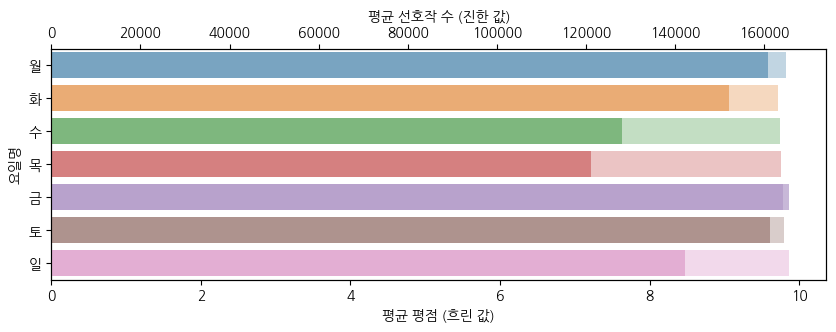

In [204]:
import seaborn as sns
%matplotlib inline

fig = plt.figure(figsize=(10,3))
ax1 = fig.add_subplot(1,1,1)
ax2 = ax1.twiny()
chart1 = sns.barplot(ax=ax1, data = srtd_df2, x='평균 평점', y='요일명', alpha = 0.3) # 평균 평점
chart2 = sns.barplot(ax=ax2, data = srtd_df2, x='선호작 수', y='요일명', alpha = 0.5) # 평균 선호작 수
chart1.set_xlabel('평균 평점 (흐린 값)')
chart2.set_xlabel('평균 선호작 수 (진한 값)')

### 가설 3 : 이용 가능 연령 DataFrame

In [172]:
import numpy as np

agelist={}
agename={0,12,15,18}
        
# 연령별 평균 평점, 평균 선호작 수 저장
for agnm in agename :
    agelist[agnm] = [0,0]
    count = 0
    for content in webtoonlist.keys() :
        if agnm == webtoonlist[content].age :
            agelist[agnm][0]+=webtoonlist[content].avg_rating10
            agelist[agnm][1]+=webtoonlist[content].select
            count+=1
        else :
            continue
    agelist[agnm][0]/=count
    agelist[agnm][1]/=count

# 연령 별 그래프
df=pandas.DataFrame(columns=['이용 가능 연령','평균 평점', '선호작 수'])
count = 0
for agnm in agelist.keys() :
    df.loc[f'{count}'] = [f'{agnm}', float(f'{agelist[agnm][0] : .3f}'), float(f'{agelist[agnm][1] : .2f}')]
    count+=1
srtd_df3=df
srtd_df3.index=srtd_df3['이용 가능 연령'].values
srtd_df3 = srtd_df3.reindex(['0','12','15','18'])
display(srtd_df3)

,이용 가능 연령,평균 평점,선호작 수
0,0,9.775,115807.08
12,12,9.826,155612.99
15,15,9.773,171357.05
18,18,9.568,128922.17


### 가설 3 : 이용 가능 연령 그래프

Text(0, 0.5, '이용 가능 연령 (세)')

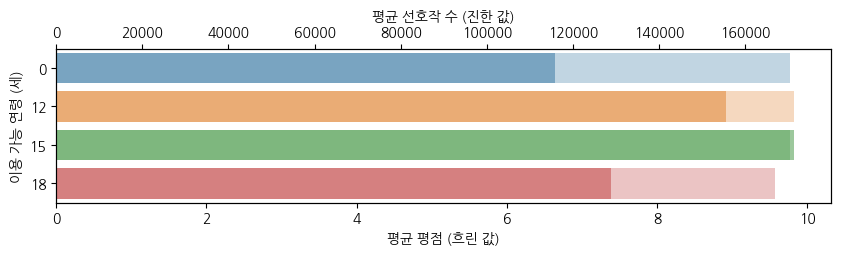

In [195]:
import seaborn as sns
%matplotlib inline

fig = plt.figure(figsize=(10,2))
ax1 = fig.add_subplot(1,1,1)
ax2 = ax1.twiny()
chart1 = sns.barplot(ax=ax1, data = srtd_df3, x='평균 평점', y='이용 가능 연령', alpha = 0.3) # 평균 평점
chart2 = sns.barplot(ax=ax2, data = srtd_df3, x='선호작 수', y='이용 가능 연령', alpha = 0.5) # 평균 선호작 수
chart1.set_xlabel('평균 평점 (흐린 값)')
chart2.set_xlabel('평균 선호작 수 (진한 값)')
chart1.set_ylabel('이용 가능 연령 (세)')

### 가설 4 ( 기존 ) : 작가 DataFrame
→ 작가의 수가 많아 시인성 떨어짐 ( 수정 필요 )

In [185]:
import numpy as np

artistslist={}
artistsname=set()
# 작가 이름 저장
for content in webtoonlist.keys() :
    for name in webtoonlist[content].artists :
        artistsname.add(name)
        
# 작가별 평균 평점, 평균 선작수 저장
for atnm in artistsname :
    artistslist[atnm]=[0,0] # 평균 평점, 평균 선호작수
    count = 0
    for content in webtoonlist.keys() :
        if atnm in webtoonlist[content].artists :
            artistslist[atnm][0]+=webtoonlist[content].avg_rating10
            artistslist[atnm][1]+=webtoonlist[content].select
            count+=1
        else :
            continue
    # 작가가 그린 웹툰의 수에 맞춰 artistslist 재편성
    if count>=2 :
        artistslist[atnm][0]/=count # 평균 평점
        artistslist[atnm][1]/=count # 평균 선호작수
    

print('작가 인원 수 : ', len(artistslist), '개', sep='')

# 태그 별 그래프
df=pandas.DataFrame(columns=['작가명','평균 평점', '선호작 수'])
count = 0
for atnm in artistslist.keys() :
    df.loc[f'{count}'] = [atnm, float(f'{artistslist[atnm][0] : .3f}'), float(f'{artistslist[atnm][1] : .2f}')]
    count+=1
srtd_df4 = df.sort_values(by='선호작 수', ascending=False)
display(srtd_df4) # 평균 평점 내림차순 정리

작가 인원 수 : 901개


,작가명,평균 평점,선호작 수
114,박태준,9.352,2352598.0
792,SIU,9.496,1968610.0
255,전선욱,8.951,1644570.0
301,조용석,9.837,1142600.0
118,모랑지,9.319,1125865.0
...,...,...,...
302,또이,9.403,7378.0
322,최날,9.175,6714.0
38,래드,9.643,6617.0
146,김부농,9.520,5410.0


### 가설 4 ( 기존 ) : 작가 그래프
→ 작가의 수가 많아 시인성 떨어짐 ( 수정 필요 )

Text(0.5, 0, '평균 선호작 수 (진한 값)')

C:\Users\Adminator\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from current font.
  func(*args, **kwargs)
C:\Users\Adminator\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


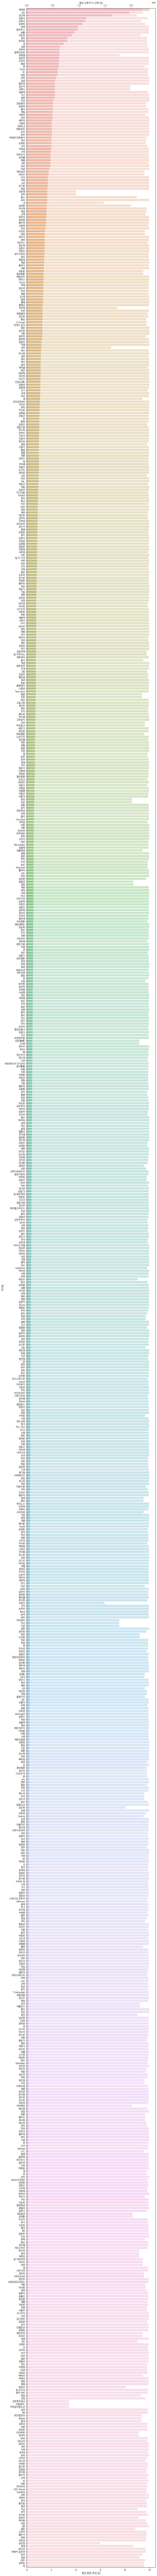

In [196]:
import seaborn as sns
%matplotlib inline

fig = plt.figure(figsize=(10,200))
ax1 = fig.add_subplot(1,1,1)
ax2 = ax1.twiny()
chart1 = sns.barplot(ax=ax1, data = srtd_df4, x='평균 평점', y='작가명', alpha = 0.3) # 평균 평점
chart2 = sns.barplot(ax=ax2, data = srtd_df4, x='선호작 수', y='작가명', alpha = 0.5) # 평균 선호작 수
chart1.set_xlabel('평균 평점 (흐린 값)')
chart2.set_xlabel('평균 선호작 수 (진한 값)')

### 가설 4 ( 수정 ) : 웹툰 20회 이하 작품 필터링

In [237]:
webtoonlist2={}
for content in webtoon :
    webtoonlist2[content] = Webtoon(content)

In [360]:
for href in href_list :
    # 웹툰 페이지로 이동
    driver.get(href)
    time.sleep(2)
    
    # 웹툰 페이지 제목 가져오기
    name = driver.find_element(By.CLASS_NAME, 'EpisodeListInfo__title--mYLjC')
    try :       # 휴재(<i> class)가 존재하는 경우
        name.find_element('tag name', 'i').text
        content = name.text.strip("\n휴재")
    except :    # 존재하지 않는 경우
        content = name.text
    
    # class에 데이터 채우기
    if webtoonlist2[content].name == content :

        # 평점 설정 / 20개 회차 이하 연재의 경우 삭제
        amount = 0.0
        amount_list = driver.find_elements(By.CLASS_NAME, 'EpisodeListList__item--M8zq4')
        if len(amount_list) >= 20 :
            count_amount = 10
        else :
            del(webtoonlist2[content])
            continue

        for i in range(count_amount) :    
            amount+=float(amount_list[i].find_element(By.CLASS_NAME, 'text').text)
        amount/=count_amount
        webtoonlist2[content].SetWTRating(amount)

        # 작가 / 요일 / 나이 설정
        artist, day, age = [], '', ''
        webtoon_info_list = None
        webtoon_info_list = driver.find_element(By.CSS_SELECTOR, '#content > div.EpisodeListInfo__comic_info--yRAu0 > div > div.ContentMetaInfo__meta_info--GbTg4').text.split("\n")
        day, age = webtoon_info_list[-3], webtoon_info_list[-1]
        for i in range(3) :
            webtoon_info_list.remove(webtoon_info_list[-1])
        if len(webtoon_info_list) == 6 :
            webtoon_info_list.remove(webtoon_info_list[-1])
            webtoon_info_list.remove(webtoon_info_list[-1])
        for i in range(int(len(webtoon_info_list)/2)) :
            artist.append(webtoon_info_list[2*i+1])
        webtoonlist2[content].SetWTArtists(artist)
        webtoonlist2[content].SetWTDay(day)
        webtoonlist2[content].SetWTAge(age)

        # 태그 설정
        tag = []
        tag_list = None
        tag_list = driver.find_element(By.CSS_SELECTOR, '#content > div.EpisodeListInfo__comic_info--yRAu0 > div > div.EpisodeListInfo__summary_wrap--ZWNW5 > div > div').text
        tag = tag_list.split("\n")
        webtoonlist2[content].SetWTTags(tag)

        # 선작 설정
        webtoonlist2[content].SetWTSelect(int(driver.find_element(By.CLASS_NAME, 'EpisodeListUser__count--fNEWK').text.replace(',','')))

NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=114.0.5735.90)
Stacktrace:
Backtrace:
	GetHandleVerifier [0x00B48893+48451]
	(No symbol) [0x00ADB8A1]
	(No symbol) [0x009E5058]
	(No symbol) [0x009CD073]
	(No symbol) [0x00A2DEBB]
	(No symbol) [0x00A3BFD3]
	(No symbol) [0x00A2A0B6]
	(No symbol) [0x00A07E08]
	(No symbol) [0x00A08F2D]
	GetHandleVerifier [0x00DA8E3A+2540266]
	GetHandleVerifier [0x00DE8959+2801161]
	GetHandleVerifier [0x00DE295C+2776588]
	GetHandleVerifier [0x00BD2280+612144]
	(No symbol) [0x00AE4F6C]
	(No symbol) [0x00AE11D8]
	(No symbol) [0x00AE12BB]
	(No symbol) [0x00AD4857]
	BaseThreadInitThunk [0x75DB00C9+25]
	RtlGetAppContainerNamedObjectPath [0x77D57B4E+286]
	RtlGetAppContainerNamedObjectPath [0x77D57B1E+238]


### 가설 4 ( 수정 ) : 작가 DataFrame

In [339]:
import numpy as np

artistslist={}
artistsname=set()
webtooncount={}

# 작가 이름 저장
for content in webtoonlist2.keys() :
    for name in webtoonlist2[content].artists :
        artistsname.add(name)
        
# 작가별 평균 평점, 평균 선호작 수 저장
for atnm in artistsname :
    artistslist[atnm]=[0,0,0] # 평균 평점, 평균 선호작 수, 작가가 그린 웹툰의 수
    for content in webtoonlist2.keys() :
        if atnm in webtoonlist2[content].artists :
            artistslist[atnm][0]+=webtoonlist2[content].avg_rating10
            artistslist[atnm][1]+=webtoonlist2[content].select
            artistslist[atnm][2]+=1
del(artistslist['금요웹툰'])
del(artistslist['그림'])
del(artistslist['원작'])

# 작가가 그린 웹툰의 수 별 평점
for i in range(1,10) :
    webtooncount[i]=[0,0,0] # 평균 평점, 평균 선호작 수, count
for atnm in artistslist.keys() :
    for i in range(1,10) :
        if artistslist[atnm][2] == i :
            webtooncount[i][0]+=artistslist[atnm][0]
            webtooncount[i][1]+=artistslist[atnm][1]
            webtooncount[i][2]+=i

for i in range(1,10) :
    if webtooncount[i][2] == 0 :
        del(webtooncount[i])
    else :
        webtooncount[i][0]/=webtooncount[i][2]
        webtooncount[i][1]/=webtooncount[i][2]

# 작가가 그린 웹툰의 수 별 그래프
df=pandas.DataFrame(columns=['웹툰 수','평균 평점', '선호작 수'])
count = 0
for cntnm in webtooncount.keys() :
    df.loc[f'{count}'] = [f'{int(cntnm)}', float(f'{webtooncount[cntnm][0] : .3f}'), float(f'{webtooncount[cntnm][1] : .2f}')]
    count+=1
srtd_df5 = df
display(srtd_df5) # 평균 평점 내림차순 정리

,웹툰 수,평균 평점,선호작 수
0,1,9.799,163527.20
1,2,9.919,214235.43
2,3,9.953,160497.17
3,4,9.643,66723.50
4,6,9.718,456159.17


### 가설 4 ( 수정 ) : 작가 그래프

Text(0, 0.5, '웹툰 수 (개)')

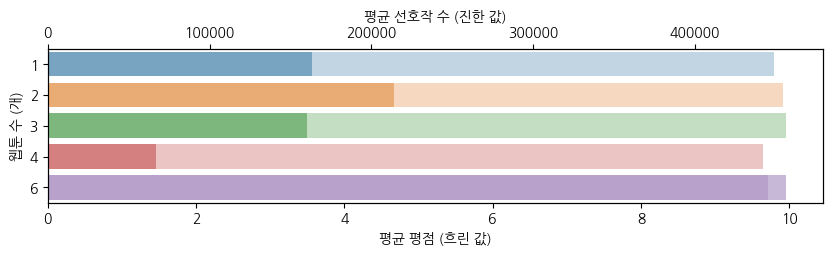

In [340]:
import seaborn as sns
%matplotlib inline

fig = plt.figure(figsize=(10,2))
ax1 = fig.add_subplot(1,1,1)
ax2 = ax1.twiny()
chart1 = sns.barplot(ax=ax1, data = srtd_df5, x='평균 평점', y='웹툰 수', alpha = 0.3) # 평균 평점
chart2 = sns.barplot(ax=ax2, data = srtd_df5, x='선호작 수', y='웹툰 수', alpha = 0.5) # 평균 선호작 수
chart1.set_xlabel('평균 평점 (흐린 값)')
chart2.set_xlabel('평균 선호작 수 (진한 값)')
chart1.set_ylabel('웹툰 수 (개)')

### 가설 4 ( 수정 ) : 웹툰 2개 / 3개 이상 작가 DataFrame

In [356]:
import numpy as np

srtd_df6=[{},{}]

# Webtooncountlist에 2개 / 3개 이상을 그린 작가 리스트 입력
for atnm in artistslist.keys() :
    if artistslist[atnm][2] == 2 :
        srtd_df6[0][atnm]=artistslist[atnm]
    elif artistslist[atnm][2] >=3 :
        srtd_df6[1][atnm]=artistslist[atnm]

# 2개 / 3개 이상을 그린 작가 DataFrame
for i in range (0,2) :
    df=pandas.DataFrame(columns=['작가명','평균 평점', '선호작 수'])
    count = 0
    for atnm in srtd_df6[i].keys() :
        if i == 0 :
            df.loc[f'{count}'] = [f'{atnm}', float(f'{srtd_df6[i][atnm][0]/srtd_df6[i][atnm][2] : .3f}'), float(f'{srtd_df6[i][atnm][1]/srtd_df6[i][atnm][2] : .2f}')]
            count+=1
        else :
            df.loc[f'{count}'] = [f'({srtd_df6[i][atnm][2]}개) {atnm}', float(f'{srtd_df6[i][atnm][0]/srtd_df6[i][atnm][2] : .3f}'), float(f'{srtd_df6[i][atnm][1]/srtd_df6[i][atnm][2] : .2f}')]
            count+=1
    srtd_df6[i]=df
srtd_df6[0] = srtd_df6[0].sort_values(by='선호작 수', ascending=False)
srtd_df6[1].index = srtd_df6[1]['작가명'].values
srtd_df6[1] = srtd_df6[1].reindex(['(3개) 명랑', '(3개) JP', '(4개) HYBE', '(6개) 박태준 만화회사'])
display(srtd_df6[0], srtd_df6[1])

,작가명,평균 평점,선호작 수
16,히어리,9.950,629631.0
3,신형욱,9.910,365054.5
5,이연,9.951,303256.5
1,홍실,9.721,302707.0
8,성은,9.923,271628.0
18,팀 더 지크,9.946,264622.0
20,조형근,9.931,243769.0
6,기맹기,9.935,232852.5
17,엄키,9.943,204993.0
2,강하다,9.974,204198.0


,작가명,평균 평점,선호작 수
(3개) 명랑,(3개) 명랑,9.955,77495.33
(3개) JP,(3개) JP,9.951,243499.00
(4개) HYBE,(4개) HYBE,9.643,66723.50
(6개) 박태준 만화회사,(6개) 박태준 만화회사,9.718,456159.17


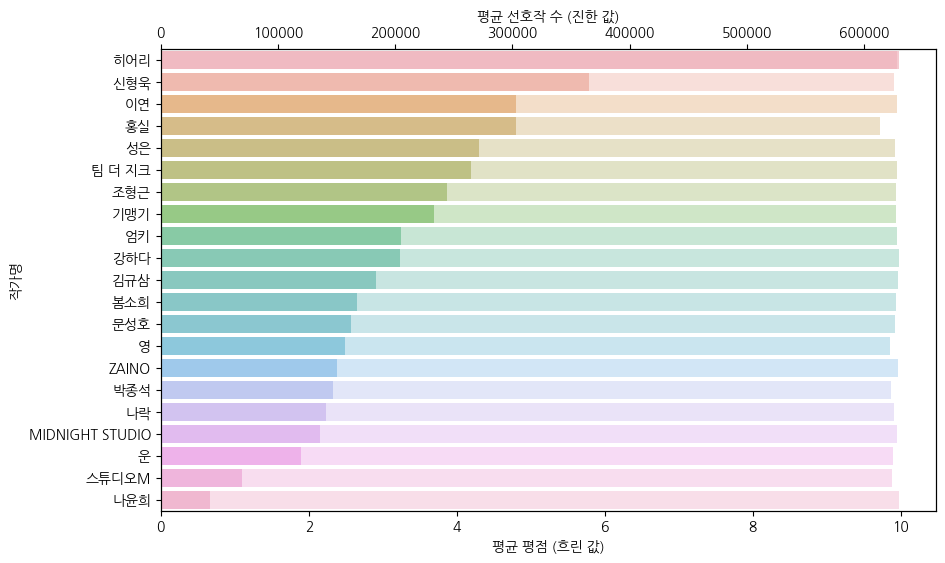

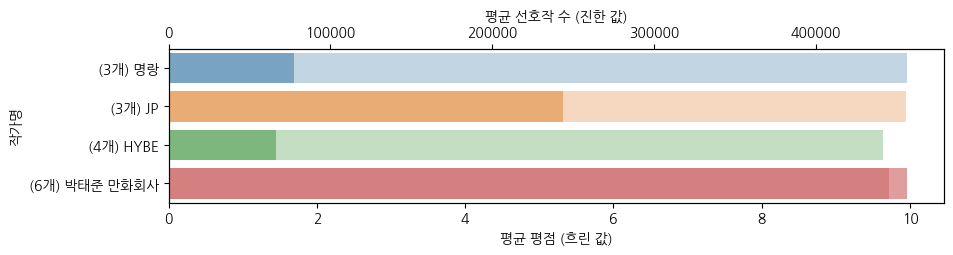

In [359]:
import seaborn as sns
%matplotlib inline

for i in range(0,2) :
    if i==0 :
        fig = plt.figure(figsize=(10,6))
    else :
        fig = plt.figure(figsize=(10,2))
    ax1 = fig.add_subplot(1,1,1)
    ax2 = ax1.twiny()
    chart1 = sns.barplot(ax=ax1, data = srtd_df6[i], x='평균 평점', y='작가명', alpha = 0.3) # 평균 평점
    chart2 = sns.barplot(ax=ax2, data = srtd_df6[i], x='선호작 수', y='작가명', alpha = 0.5) # 평균 선호작 수
    chart1.set_xlabel('평균 평점 (흐린 값)')
    chart2.set_xlabel('평균 선호작 수 (진한 값)')
    chart1.set_ylabel('작가명')